# ---------------- CNN on MNIST DATA -------------------

## 3-Layered CNN + sigmoid + relu + Adadelta

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
print('y_train.shape :',y_train.shape)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_test.shape :',y_test.shape)
model = Sequential()
model.add(Conv2D(50, kernel_size=(20, 20),strides=(2, 2),
                 activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(25, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(30, (1, 1), activation='relu'))
model.add(Dropout(0.7))
model.add(Conv2D(10,(1,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

value = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train.shape : (60000, 10)
y_test.shape : (10000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 278us/step - loss: 1.5111 - acc: 0.4434 - val_loss: 0.6490 - val_acc: 0.8652
Epoch 2/12
60000/60000 [==============================] - 9s 145us/step - loss: 1.0271 - acc: 0.6257 - val_loss: 0.5225 - val_acc: 0.8444
Epoch 3/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.9079 - acc: 0.6727 - val_loss: 0.4120 - val_acc: 0.9147
Epoch 4/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.8363 - acc: 0.7039 - val_loss: 0.3882 - val_acc: 0.9224
Epoch 5/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.7888 - acc: 0.7250 - val_loss: 0.3680 - val_acc: 0.9223
Epoch 6/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.7597 - acc: 0.7362 - val_loss: 0.3257 - val_acc: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.23841434007883072
Test accuracy: 0.9556


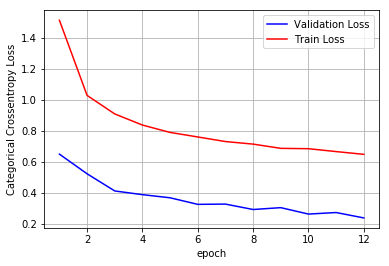

In [3]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3-Layered CNN+ sigmoid +relu+BN+adagrad

In [13]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(20, 20),strides=(2, 2),
                 activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(25, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(30, (1, 1), activation='relu'))
model.add(Conv2D(40,(1,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, kernel_initializer='random_normal'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

value = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.3542 - acc: 0.9028 - val_loss: 0.1824 - val_acc: 0.9454
Epoch 2/15
60000/60000 [==============================] - 4s 64us/step - loss: 0.1446 - acc: 0.9574 - val_loss: 0.1398 - val_acc: 0.9574
Epoch 3/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.1206 - acc: 0.9642 - val_loss: 0.1220 - val_acc: 0.9617
Epoch 4/15
60000/60000 [==============================] - 4s 72us/step - loss: 0.1058 - acc: 0.9684 - val_loss: 0.1228 - val_acc: 0.9607
Epoch 5/15
60000/60000 [==============================] - 4s 72us/step - loss: 0.0961 - acc: 0.9711 - val_loss: 0.1084 - val_acc: 0.9672
Epoch 6/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.0889 - acc: 0.9730 - val_loss: 0.1071 - val_acc: 0.9670
Epoch 7/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0845 - acc: 0.9746 - val_loss: 0.1019 - val_acc

Test score: 0.09622555249566213
Test accuracy: 0.9706


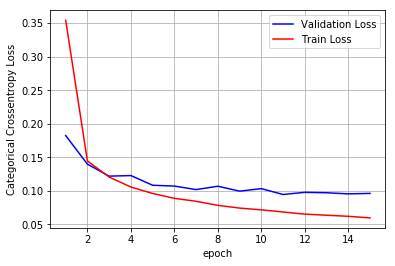

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3-Layered CNN+ tanh +relu+ Dropout + adam

In [15]:
model = Sequential()
model.add(Conv2D(5, kernel_size=(10, 10),strides=(2, 2),
                 activation='relu', input_shape=input_shape))
model.add(Conv2D(25, (5,5 ), activation='tanh'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.4))
model.add(Conv2D(30, (2, 2), activation='tanh'))
model.add(Dropout(0.7))
model.add(Conv2D(10,(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, kernel_initializer='RandomUniform'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

value = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 96us/step - loss: 1.3161 - acc: 0.5267 - val_loss: 0.3451 - val_acc: 0.9089
Epoch 2/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.6603 - acc: 0.7823 - val_loss: 0.1934 - val_acc: 0.9430
Epoch 3/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.5166 - acc: 0.8360 - val_loss: 0.1439 - val_acc: 0.9541
Epoch 4/15
60000/60000 [==============================] - 5s 76us/step - loss: 0.4423 - acc: 0.8601 - val_loss: 0.1286 - val_acc: 0.9584
Epoch 5/15
60000/60000 [==============================] - 4s 75us/step - loss: 0.4008 - acc: 0.8744 - val_loss: 0.1102 - val_acc: 0.9659
Epoch 6/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.3689 - acc: 0.8844 - val_loss: 0.1105 - val_acc: 0.9658
Epoch 7/15
60000/60000 [==============================] - 4s 73us/step - loss: 0.3452 - acc: 0.8915 - val_loss: 0.1082 - val_acc

Test score: 0.06771625264753821
Test accuracy: 0.9792


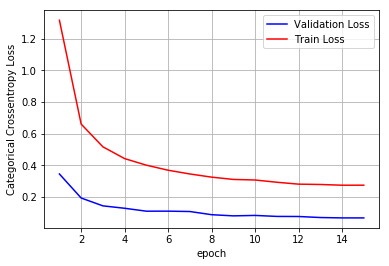

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5-layered CNN+  relu + sig + BN + Dropouts + adam

In [4]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train.shape :',y_train.shape)
print('y_test.shape :',y_test.shape)
model_1 = Sequential()
model_1.add(Conv2D(5, kernel_size=(2, 2),activation='tanh',input_shape=input_shape))
model_1.add(BatchNormalization())
model_1.add(Conv2D(10,(3,3),activation='sigmoid'))
model_1.add(Conv2D(30,(5,5),activation='relu'))
model_1.add(Dropout(0.6))
model_1.add(Conv2D(10,(10,10),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(5,(5,5),activation = 'tanh'))
model_1.add(BatchNormalization())
model_1.add(Flatten())
model_1.add(Dropout(0.4))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

value = model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train.shape : (60000, 10)
y_test.shape : (10000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 38s 630us/step - loss: 0.5976 - acc: 0.8084 - val_loss: 0.0953 - val_acc: 0.9704
Epoch 2/12
60000/60000 [==============================] - 36s 602us/step - loss: 0.1887 - acc: 0.9422 - val_loss: 0.0674 - val_acc: 0.9778
Epoch 3/12
60000/60000 [==============================] - 36s 607us/step - loss: 0.1447 - acc: 0.9562 - val_loss: 0.0545 - val_acc: 0.9841
Epoch 4/12
60000/60000 [==============================] - 37s 611us/step - loss: 0.1312 - acc: 0.9616 - val_loss: 0.0555 - val_acc: 0.9827
Epoch 5/12
60000/60000 [==============================] - 37s 612us/step - loss: 0.1172 - acc: 0.9652 - val_loss: 0.0421 - val_acc: 0.9869
Epoch 6/12
60000/60000 [==============================] - 37s 618us/step - loss: 0.1084 - acc: 0.9675 - val_loss: 0.0432 - val_

Test score: 0.23841434007883072
Test accuracy: 0.9556


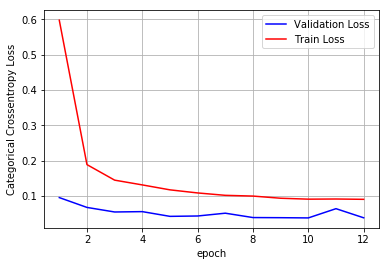

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5-layered CNN+  tanh + sig + BN  + SGD

In [18]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train.shape :',y_train.shape)
print('y_test.shape :',y_test.shape)
model_1 = Sequential()
model_1.add(Conv2D(15, kernel_size=(2, 2),activation='tanh',input_shape=input_shape))
model_1.add(BatchNormalization())
model_1.add(Conv2D(20,(3,3),activation='sigmoid'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(30,(5,5),activation='tanh'))
model_1.add(Conv2D(10,(10,10),activation='tanh'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(15,(5,5),activation = 'tanh'))
model_1.add(BatchNormalization())
model_1.add(Flatten())
model_1.add(Dense(128, activation='sigmoid'))
model.add(Dense(100, kernel_initializer='Identity'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

value = model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train.shape : (60000, 10)
y_test.shape : (10000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 45s 747us/step - loss: 1.5723 - acc: 0.6920 - val_loss: 1.1275 - val_acc: 0.8711
Epoch 2/15
60000/60000 [==============================] - 44s 726us/step - loss: 0.8746 - acc: 0.9079 - val_loss: 0.6286 - val_acc: 0.9403
Epoch 3/15
60000/60000 [==============================] - 45s 746us/step - loss: 0.5063 - acc: 0.9478 - val_loss: 0.3778 - val_acc: 0.9604
Epoch 4/15
60000/60000 [==============================] - 46s 765us/step - loss: 0.3293 - acc: 0.9623 - val_loss: 0.2589 - val_acc: 0.9680
Epoch 5/15
60000/60000 [==============================] - 47s 775us/step - loss: 0.2385 - acc: 0.9697 - val_loss: 0.1936 - val_acc: 0.9742
Epoch 6/15
60000/60000 [==============================] - 47s 788us/step - loss: 0.1870 - acc: 0.9741 - val_loss: 0.1613 - val_

Test score: 0.0625388405263424
Test accuracy: 0.988


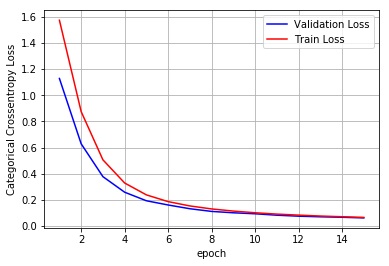

In [19]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5-layered CNN+  tanh + relu + Dropouts  + adadelts

In [20]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train.shape :',y_train.shape)
print('y_test.shape :',y_test.shape)
model_1 = Sequential()
model_1.add(Conv2D(15, kernel_size=(2, 2),activation='tanh',input_shape=input_shape))
model_1.add(Dropout(0.5))
model_1.add(Conv2D(20,(3,3),activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Conv2D(30,(5,5),activation='tanh'))
model_1.add(Conv2D(10,(10,10),activation='tanh'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(15,(5,5),activation = 'tanh'))
model_1.add(Dropout(0.2))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model.add(Dense(100, kernel_initializer='glorot_normal'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adadelta(),
              metrics=['accuracy'])

value = model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train.shape : (60000, 10)
y_test.shape : (10000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 55s 917us/step - loss: 0.4242 - acc: 0.8694 - val_loss: 0.1191 - val_acc: 0.9634
Epoch 2/15
60000/60000 [==============================] - 53s 891us/step - loss: 0.1384 - acc: 0.9573 - val_loss: 0.0756 - val_acc: 0.9762
Epoch 3/15
60000/60000 [==============================] - 53s 891us/step - loss: 0.1016 - acc: 0.9696 - val_loss: 0.0701 - val_acc: 0.9776
Epoch 4/15
60000/60000 [==============================] - 53s 891us/step - loss: 0.0824 - acc: 0.9750 - val_loss: 0.0500 - val_acc: 0.9836
Epoch 5/15
60000/60000 [==============================] - 53s 891us/step - loss: 0.0733 - acc: 0.9777 - val_loss: 0.0499 - val_acc: 0.9851
Epoch 6/15
60000/60000 [==============================] - 54s 892us/step - loss: 0.0663 - acc: 0.9797 - val_loss: 0.0442 - val_

Test score: 0.04097759123484138
Test accuracy: 0.9874


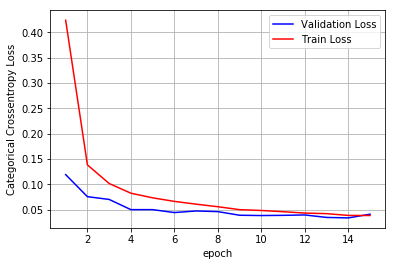

In [21]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## 7- Layered CNN + relu + tanh + sig + adagrad

In [6]:
batch_size = 250
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
print('y_train.shape :',y_train.shape)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_test.shape :',y_test.shape)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train.shape : (60000, 10)
y_test.shape : (10000, 10)


In [23]:
model_1st = Sequential()
model_1st.add(Conv2D(5, kernel_size=(2, 2),strides=(2, 2),
                 activation='tanh', input_shape=input_shape))
model_1st.add(BatchNormalization())
model_1st.add(Conv2D(50, (3, 3), activation='sigmoid'))
model_1st.add(Dropout(0.4))
model_1st.add(BatchNormalization())
model_1st.add(Conv2D(20, (2, 2), activation='relu'))
model_1st.add(Conv2D(30, (4, 4), activation='tanh'))
model_1st.add(Dropout(0.6))
model_1st.add(Conv2D(10, (6, 6), activation='sigmoid'))
model_1st.add(MaxPooling2D(pool_size=(3, 3)))
model_1st.add(Conv2D(40, (1, 1), activation='tanh'))
model_1st.add(Conv2D(50, (1, 1), activation='relu'))
model_1st.add(Dropout(0.7))
model_1st.add(BatchNormalization())
model_1st.add(Conv2D(5, (1, 1), activation='relu'))
model_1st.add(Flatten())
model_1st.add(Dense(128, activation='relu'))
model_1st.add(Dropout(0.5))
model_1st.add(Dense(num_classes, activation='softmax'))

model_1st.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

value = model_1st.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1st.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 22s 361us/step - loss: 2.1071 - acc: 0.1939 - val_loss: 1.7350 - val_acc: 0.3777
Epoch 2/15
60000/60000 [==============================] - 20s 335us/step - loss: 1.6117 - acc: 0.3768 - val_loss: 1.2282 - val_acc: 0.6031
Epoch 3/15
60000/60000 [==============================] - 20s 334us/step - loss: 1.4056 - acc: 0.4524 - val_loss: 1.0894 - val_acc: 0.5994
Epoch 4/15
60000/60000 [==============================] - 20s 337us/step - loss: 1.3008 - acc: 0.4944 - val_loss: 0.9853 - val_acc: 0.6589
Epoch 5/15
60000/60000 [==============================] - 20s 337us/step - loss: 1.2322 - acc: 0.5279 - val_loss: 0.8829 - val_acc: 0.7711
Epoch 6/15
60000/60000 [==============================] - 20s 336us/step - loss: 1.1641 - acc: 0.5658 - val_loss: 0.7746 - val_acc: 0.7986
Epoch 7/15
60000/60000 [==============================] - 20s 338us/step - loss: 1.0781 - acc: 0.6115 - val_loss: 0.

Test score: 0.37306189494132996
Test accuracy: 0.8761


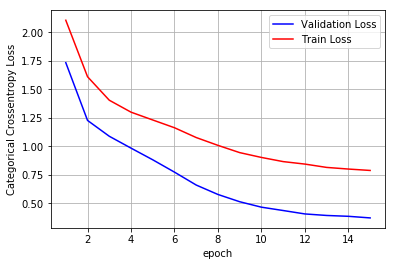

In [24]:
score = model_1st.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## 7- Layered CNN  + tanh + sig + Dropout +adadelta

In [28]:
model_1st = Sequential()
model_1st.add(Conv2D(5, kernel_size=(2, 2),strides=(2, 2),
                 activation='tanh', input_shape=input_shape))
model_1st.add(Conv2D(50, (3, 3), activation='sigmoid'))
model_1st.add(Dropout(0.4))
model_1st.add(Conv2D(60, (2, 2), activation='tanh'))
model_1st.add(Conv2D(30, (4, 4), activation='tanh'))
model_1st.add(Dropout(0.3))
model_1st.add(Conv2D(10, (6, 6), activation='sigmoid'))
model_1st.add(MaxPooling2D(pool_size=(3, 3)))
model_1st.add(Conv2D(20, (1, 1), activation='tanh'))
model_1st.add(Conv2D(20, (1, 1), activation='sigmoid'))
model_1st.add(Dropout(0.7))
model_1st.add(Conv2D(5, (1, 1), activation='tanh'))
model_1st.add(Flatten())
model_1st.add(Dense(128, activation='tanh'))
model_1st.add(Dropout(0.4))
model_1st.add(Dense(num_classes, activation='softmax'))
model_1st.add(Dense(10, kernel_initializer='glorot_uniform'))

model_1st.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

value = model_1st.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1st.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 25s 417us/step - loss: 7.7395 - acc: 0.0981 - val_loss: 7.8721 - val_acc: 0.0980
Epoch 2/15
60000/60000 [==============================] - 24s 394us/step - loss: 7.8229 - acc: 0.0988 - val_loss: 8.1010 - val_acc: 0.0980
Epoch 3/15
60000/60000 [==============================] - 24s 394us/step - loss: 7.5686 - acc: 0.0984 - val_loss: 8.1010 - val_acc: 0.0980
Epoch 4/15
60000/60000 [==============================] - 24s 400us/step - loss: 7.7022 - acc: 0.1000 - val_loss: 9.8465 - val_acc: 0.0980
Epoch 5/15
60000/60000 [==============================] - 24s 408us/step - loss: 7.1644 - acc: 0.0971 - val_loss: 1.1921e-07 - val_acc: 0.0980
Epoch 6/15
60000/60000 [==============================] - 24s 408us/step - loss: 1.1921e-07 - acc: 0.0987 - val_loss: 1.1921e-07 - val_acc: 0.0980
Epoch 7/15
60000/60000 [==============================] - 25s 409us/step - loss: 1.1921e-07 - acc: 0.098

Test score: 1.1920930376163597e-07
Test accuracy: 0.098


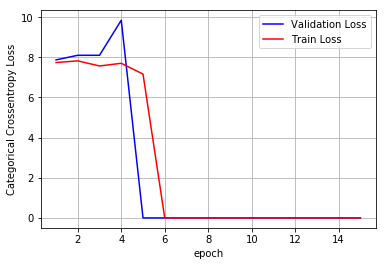

In [29]:
score = model_1st.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## 7- Layered CNN  + tanh + sig +relu + BN+ adam

In [32]:
model_1st = Sequential()
model_1st.add(Conv2D(5, kernel_size=(2, 2),strides=(2, 2),
                 activation='tanh', input_shape=input_shape))
model_1st.add(BatchNormalization())
model_1st.add(Conv2D(50, (3, 3), activation='sigmoid'))
model_1st.add(BatchNormalization())
model_1st.add(Conv2D(20, (2, 2), activation='relu'))
model_1st.add(Conv2D(30, (4, 4), activation='tanh'))
model_1st.add(Conv2D(10, (6, 6), activation='sigmoid'))
model_1st.add(MaxPooling2D(pool_size=(3, 3)))
model_1st.add(Conv2D(40, (1, 1), activation='tanh'))
model_1st.add(Conv2D(50, (1, 1), activation='relu'))
model_1st.add(BatchNormalization())
model_1st.add(Conv2D(5, (1, 1), activation='relu'))
model_1st.add(Flatten())
model_1st.add(Dense(128, activation='relu'))
model_1st.add(Dense(num_classes, activation='softmax'))
model_1st.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

value = model_1st.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1st.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 19s 313us/step - loss: 0.7928 - acc: 0.7382 - val_loss: 0.1968 - val_acc: 0.9455
Epoch 2/15
60000/60000 [==============================] - 17s 275us/step - loss: 0.1216 - acc: 0.9669 - val_loss: 0.0805 - val_acc: 0.9774
Epoch 3/15
60000/60000 [==============================] - 17s 279us/step - loss: 0.0745 - acc: 0.9785 - val_loss: 0.0735 - val_acc: 0.9789
Epoch 4/15
60000/60000 [==============================] - 17s 281us/step - loss: 0.0565 - acc: 0.9832 - val_loss: 0.0610 - val_acc: 0.9824
Epoch 5/15
60000/60000 [==============================] - 17s 280us/step - loss: 0.0459 - acc: 0.9870 - val_loss: 0.0506 - val_acc: 0.9838
Epoch 6/15
60000/60000 [==============================] - 17s 280us/step - loss: 0.0415 - acc: 0.9874 - val_loss: 0.0663 - val_acc: 0.9807
Epoch 7/15
60000/60000 [==============================] - 17s 279us/step - loss: 0.0388 - acc: 0.9880 - val_loss: 0.

Test score: 0.0400684581379639
Test accuracy: 0.9894


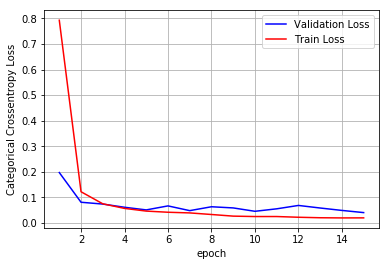

In [33]:
score = model_1st.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,epochs+1))
vy = value.history['val_loss']
ty = value.history['loss']
plt_dynamic(x, vy, ty, ax)

## conclution

In [34]:
from prettytable import from_csv
with open("cnn.csv", "r") as fp: 
    x = from_csv(fp)
    
print(x)

+------------------------+------------------------------------+----------+
| ï»¿No of hidden layers |               model                | accuracy |
+------------------------+------------------------------------+----------+
|        3-layers        |     sigmoid + relu + Adadelta      |  95.93   |
|        3-layers        |      sigmoid +relu+BN+adagrad      |  97.06   |
|        3-layers        |     tanh +relu+ Dropout + adam     |  97.92   |
|        5-layers        | relu + sig + BN + Dropouts + adam  |  95.56   |
|        5-layers        |       tanh + sig + BN  + SGD       |   98.8   |
|        5-layers        | tanh + relu + Dropouts  + adadelts |  98.74   |
|        7-layers        |    relu + tanh + sig + adagrad     |  87.61   |
|        7-layers        |   tanh + sig + Dropout +adadelta   |    98    |
|        7-layers        |    tanh + sig +relu + BN+ adam     |  98.94   |
+------------------------+------------------------------------+----------+


1) I got 98.94 accuracy when 7-layered CNN with Adam Optimizer and Batchnormalization performed well

2) I used dropouts, Batchnormalization and maxpolling in all 3-different CNN layers

3) From the above results tabel one can say that BatchNormalization improved results and gave better generalization model

3) One can achieve better accuracy even in 3,7 layered network by allowing more epocs to run

4) We know that Adam optimizer is the fastest optimizer to achive global minima, hence we achived better accuracy within less epochs